# PISA Data Analysis

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
# Display all columns
df = pd.read_csv('/content/drive/MyDrive/pisa2012.csv', encoding = 'latin')

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

Dataset Dictionary was used to identify the most interesting variables for me to be studied. I was interested in exploring how the student country, as well as parent birth countries, affect student score.

In [ ]:
df = df[['CNT', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]

df.head()

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
0,Albania,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,Albania
1,Albania,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,Albania
2,Albania,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,Albania
3,Albania,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Albania,Albania,Albania
4,Albania,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Albania,Albania,Albania


Missing values in data were replaced.



In [ ]:
# Check if there are columns with missing values

for column in df.columns:
    print(df[column].isna().sum())

In [ ]:
# Replace missing and invalid values for father, mother, and student birth country to 'Missing'

df.loc[df['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

df.loc[df['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

Per subject, the 5 plausible scores for each student are merged into one by taking the average.

In [ ]:
# Get average scores determines per subject for each student

df['Math_score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Reading_score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Science_score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5

In [ ]:
# Drop plausible score columns

df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [ ]:
# Rename columns

df.rename({'CNT' : 'Country', 'COBN_F' : 'Father_birth_country', 'COBN_M' : 'Mother_birth_country', 'COBN_S' : 'Student_birth_country'}, axis = 'columns', inplace = True)

Parental background column is added, identifying whether or not the parents are from same country.

In [ ]:
df['Parental_background'] = (df['Father_birth_country'] == df['Mother_birth_country'])

df.loc[df['Parental_background'] == True, 'Parental_background'] = 'Same'
df.loc[df['Parental_background'] == False, 'Parental_background'] = 'Different'

In [ ]:
df.head()
df.shape

(485490, 8)

# Univariate Exploration and Analysis

The distribution of scores per subject is visualized.

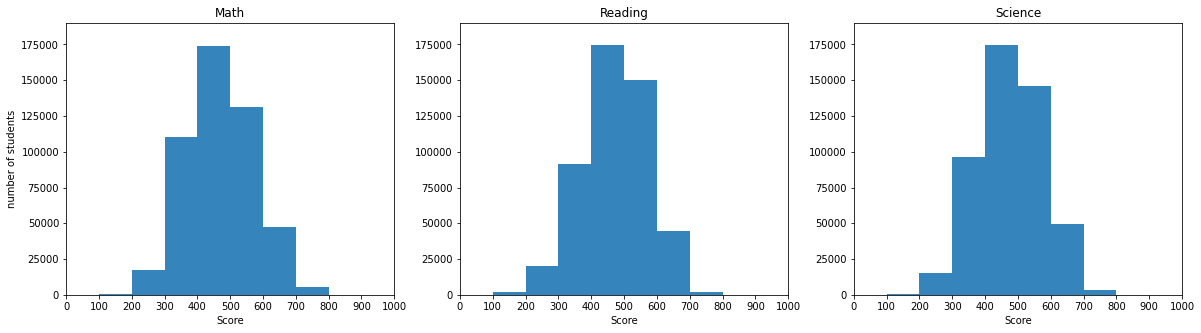

In [ ]:
plt.figure(figsize = [20, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df['Math_score'], bins = bins_hist, alpha = 0. 9);
plt.xlim(0, 1000);
plt.ylim(0, 190000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Score');
plt.ylabel('number of students')
plt.title('Math');

plt.subplot(1, 3, 2)
plt.hist(df['Reading_score'], bins = bins_hist, alpha = 0.9);
plt.xlim(0, 1000);
plt.ylim(0, 190000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Score');
plt.title('Reading');

plt.subplot(1, 3, 3)
plt.hist(df['Science_score'], bins = bins_hist, alpha = 0.9);
plt.xlim(0, 1000);
plt.ylim(0, 190000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Score');
plt.title('Science');

The scores show a normal distribution, with most students having an average score (between 400 to 500) in either Math, Reading or Science.

Countries with most students with scores higher than 700 (above average) per subject are identified.

Text(0.5, 0, 'Number of students')

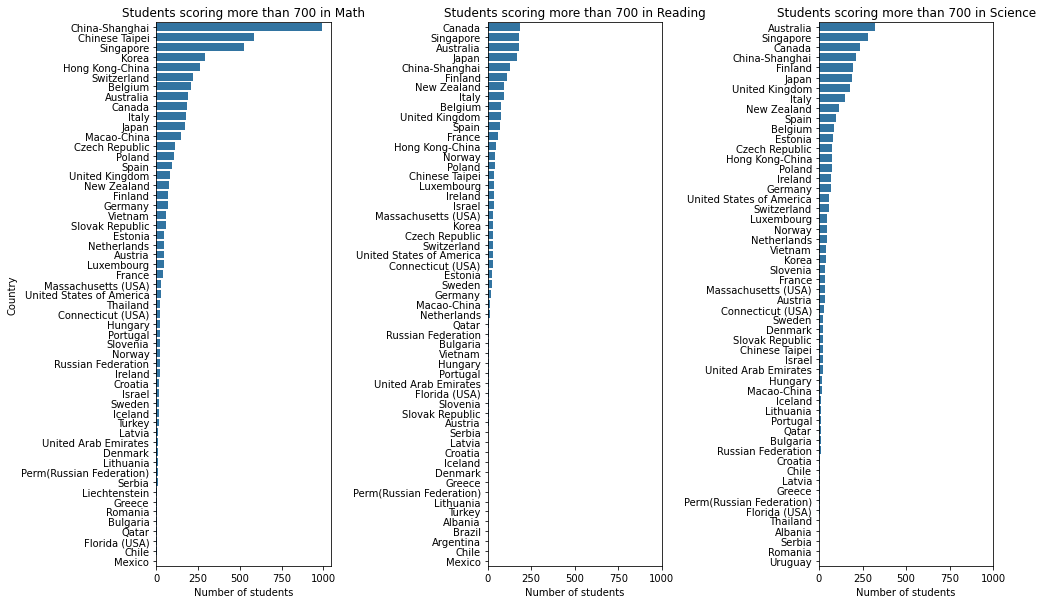

In [ ]:
# Get number of students with scores above 800 points per subject

math_700 = df[df['Math_score'] > 700]['Country'].value_counts()
reading_700 = df[df['Reading_score'] > 700]['Country'].value_counts()
science_700 = df[df['Science_score'] > 700]['Country'].value_counts()

plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.9)
x_lim_max = math_700.values[0] + 6


plt.subplot(1, 3, 1)
sb.barplot(y = math_700.index, x = math_700.values, color = sb.color_palette()[0])
plt.title('Students scoring more than 700 in Math');
plt.xlabel('Number of students')
plt.ylabel('Country')

plt.subplot(1, 3, 2)
sb.barplot(y = reading_700.index, x = reading_700.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Students scoring more than 700 in Reading');
plt.xlabel('Number of students')


plt.subplot(1, 3, 3)
sb.barplot(y = science_700.index, x = science_700.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Students scoring more than 700 in Science');
plt.xlabel('Number of students')

*   Asian countries china and singapore have dominated top 3 positions in above average math scores. 

*   Singapore has the overall highest number of above average scoring students in all three subjects.

The proportion of students having parents with same or different country is visualized.

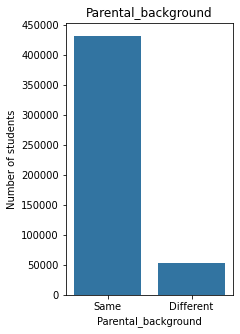

In [ ]:
plt.figure(figsize=[3, 5]);
sb.countplot(x = 'Parental_background', data = df, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel('Number of students');
plt.title('Parental_background');

The majority of students have parents from the same country.

# Bivariate Exploration and Analysis


Interesting questions are:

*   How does student country affect scores per subject?

*   Do countries with high numbers of aove average scoring students have higher scroing students in general?

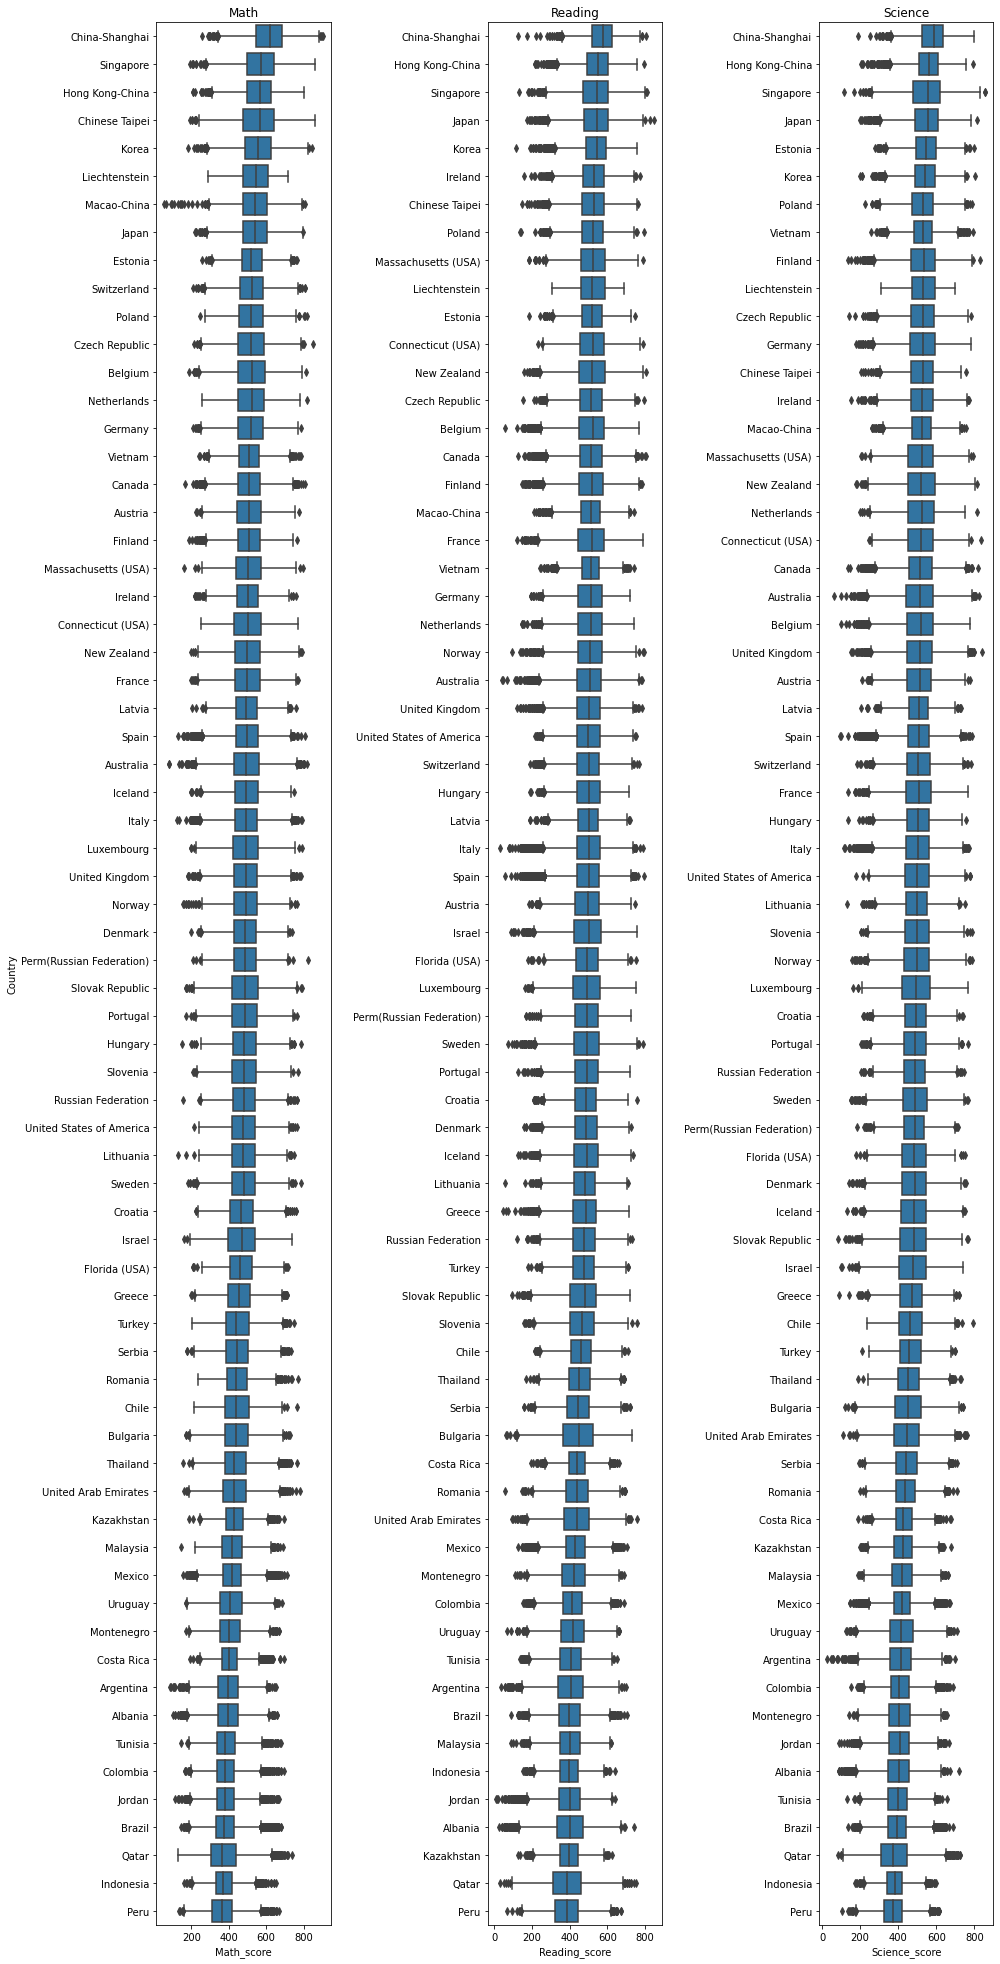

In [ ]:
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.9)

math_country_order = df.groupby('Country')['Math_score'].mean().sort_values(ascending = False).index
reading_country_order = df.groupby('Country')['Reading_score'].mean().sort_values(ascending = False).index
science_country_order = df.groupby('Country')['Science_score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Math_score'], y = df['Country'], order = math_country_order, color = sb.color_palette()[0]);
plt.ylabel('Country')
plt.title('Math');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Reading_score'], y = df['Country'], order = reading_country_order, color = sb.color_palette()[0]);
plt.ylabel('');
plt.title('Reading');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Science_score'], y = df['Country'], order = science_ountry_order, color = sb.color_palette()[0]);
plt.ylabel('');
plt.title('Science');

*   Asian countries such as China, Singapore, and Japan have, on average, the highest scoring students in all three subjects.
*   Peru is the country with the lowest average score in all three subjects, which hints at a need of improvement in their education system.
*   Mid-east countries such as Qatar, Tunisia, and Jordan have the low scoring studentys in all three subjects.

Countries with most above average scoring students in multiple subjects simeltanously are visulaized.

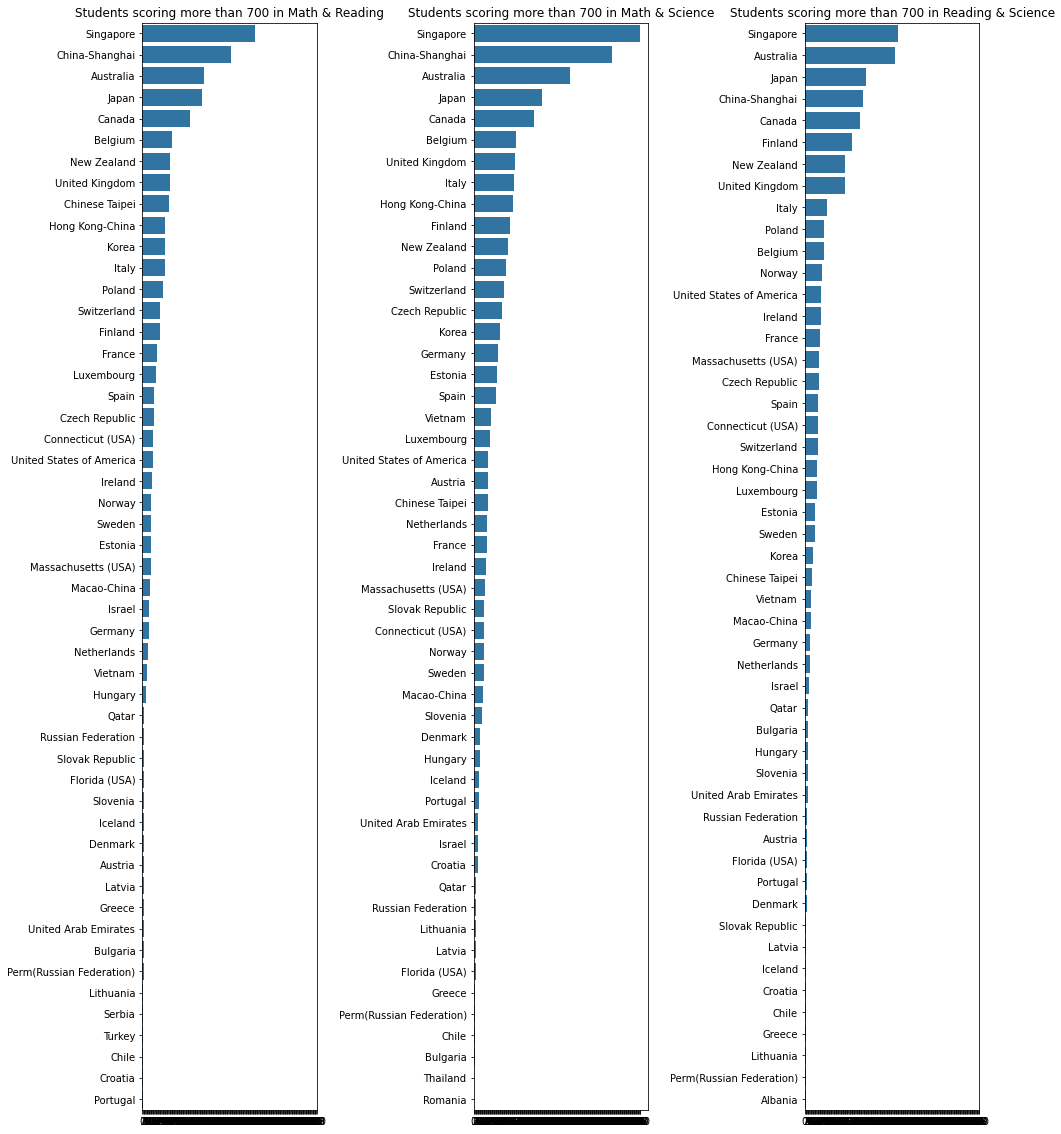

In [ ]:
high_math_reading_score = df[(df['Math_score'] >= 700) & (df['Reading_score'] >= 700)]['Country'].value_counts()
high_math_science_score = df[(df['Math Score'] >= 700) & (df['Science_score'] >= 700)]['Country'].value_counts()
high_reading_science_score = df[(df['Reading_score'] >= 700) & (df['Science_score'] >= 700)]['Country'].value_counts()

plt.figure(figsize = [15, 1])
plt.subplots_adjust(wspace = 0.9) 
x_lim_max = high_math_science_score.values[0]

plt.subplot(1, 3, 1)
sb.barplot(y = high_math_reading_score.index, x = high_math_reading_score.values, color = sb.color_palette()[0])
plt.title('Students scoring more than 700 in Math & Reading');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 2)
sb.barplot(y = high_math_science_score.index, x = high_math_science_score.values, color = sb.color_palette()[0])
plt.title('Students scoring more than 700 in Math & Science');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = high_reading_science_score.index, x = high_reading_science_score.values, color = sb.color_palette()[0])
plt.title('Students scoring more than 700 in Reading & Science');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

Singapore has the overall highest number of above average scoring students in multiple subjects simeltanously.

Scores of students having parents from same and different cultural backgrounds are visualized.

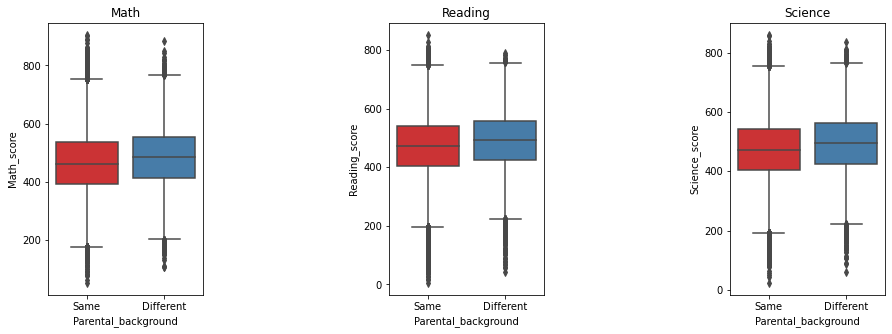

In [ ]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Parental_background'], y = df['Math_score'], palette = 'Set1')
plt.title('Math');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Parental_background'], y = df['Reading_score'], palette = 'Set1')
plt.title('Reading');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Parental_background'], y = df['Science_score'], palette = 'Set1');
plt.title('Science');

Students with parents having the same cultural background have higher scores in all three subjects on average.

# Multivariate Exploration and Analysis

Correlation between score in one subject with score in the other two subjects is visualized.

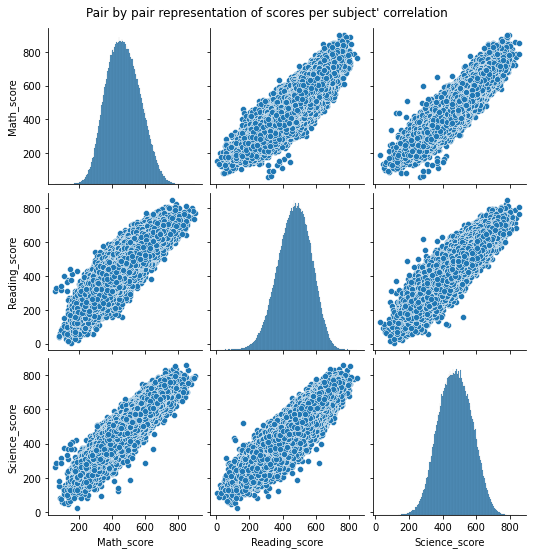

In [ ]:
grid = sb.pairplot(data = df, vars=["Math_score", "Reading_score", "Science_score"]);
grid.fig.suptitle("Pair by pair representation of scores per subject' correlation", y = 1.02);


*   A strong and positive correlation between the score of any two subjects is seen, indicating that students scoring high one subject tend to score high in the other two subjects.
*   It can be noticed that for a small number of students math performance may be disproportionaely weaker than reading or science performance.



Countries with more than a 10 position difference between rankings in each subject are obtained, with the countries and score distribution in each subject visualized.

In [ ]:
country_outliers = []

for country in df['Country'].unique():
    if ((np.abs((math_country_order.get_loc(country) - reading_country_order.get_loc(country))) > 10) | (np.abs((math_country_order.get_loc(country) - science_country_order.get_loc(country))) > 10) | (np.abs((reading_country_order.get_loc(country) - science_country_order.get_loc(country))) > 10)):
        country_outliers.append(country)
      
country_outliers.sort()

for country in country_outliers:
    print((country) + ':' + str((30 - len(country) + 1) * ' ') + 'Math rank: ' + str(math_country_order.get_loc(country)) + str((5 - len(str(math_country_order.get_loc(country))) + 1) * ' ') + 'Reading rank: ' + str(reading_country_order.get_loc(country)) + str((5 - len(str(reading_country_order.get_loc(country))) + 1) * ' ') + 'Science rank: ' + str(science_country_order.get_loc(country)))


Austria:                        Math rank: 17    Reading rank: 31    Science rank: 23
Florida (USA):                  Math rank: 44    Reading rank: 33    Science rank: 40
Iceland:                        Math rank: 27    Reading rank: 40    Science rank: 42
Ireland:                        Math rank: 20    Reading rank: 5     Science rank: 13
Israel:                         Math rank: 43    Reading rank: 32    Science rank: 44
Kazakhstan:                     Math rank: 53    Reading rank: 65    Science rank: 54
Macao-China:                    Math rank: 6     Reading rank: 17    Science rank: 14
Massachusetts (USA):            Math rank: 19    Reading rank: 8     Science rank: 15
Norway:                         Math rank: 31    Reading rank: 22    Science rank: 33
Slovak Republic:                Math rank: 34    Reading rank: 45    Science rank: 43
Slovenia:                       Math rank: 37    Reading rank: 46    Science rank: 32
Switzerland:                    Math rank: 9     Readi

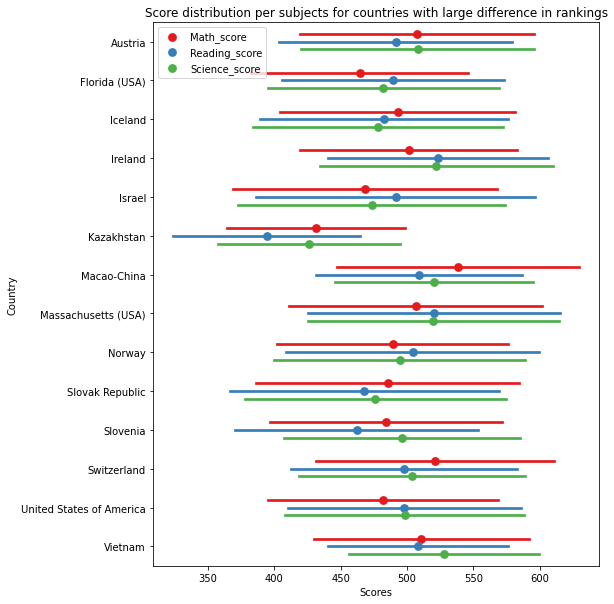

In [ ]:
df_country_outliers = df[['Country', 'Math_score', 'Reading_score', 'Science_score']][df['Country'].isin(country_outliers)]
df_country_outliers = df_country_outliers.melt('Country', var_name = 'Score Type', value_name = 'Scores')

plt.figure(figsize = [8, 10])

sb.pointplot(x = 'Scores', y = 'Country', hue = 'Score Type', data = df_country_outliers, linestyles = '', dodge = 0.4, ci = 'sd', palette = 'blue', order = country_outliers);
plt.legend(loc = 2);
plt.title('Score distribution per subjects for countries with large difference in rankings');

for each country, we can see the subject(s) which is outlying from other scores. For example, in the USA math scores are disproportionately lower than reading/science scores.

# Conclusion and Summary of Results

 *   The scores for each subject showed a normal distribution, with most students having an average score between 400 to 500.

*   The majority of students have parents from the same country with students having parents with the same country acheiving higher scores in all three subjects on average.

*   A strong and positive correlation between the score of any two subjects is 
seen, indicating that students scoring high one subject tend to score high in the other two subjects, but it can be noticed that for a small number of students math performance may be disproportionaely weaker than reading or science performance.

*   Asian countries such as China, Singapore, and Japan have, on average, the highest scoring students in all three subjects. Meanwhile, Peru is the country with the lowest average score in all three subjects, which hints at a need of improvement in their education system, while Mid-east countries, such as Qatar, Tunisia, and Jordan have the low scoring studentys in all three subjects.

*   For some countries there is a large difference in ranking between the three subjects. For example, in the USA math scores are disproportionately lower than reading/science scores.

*   Asian countries like china and singapore have most students obtaining above average math scores. While Singapore has the overall highest number students with above average scoring students in all three subjects together, and in multiple subjects simeltanously.